# Linear Regression Model on California_housing data.
LINEARITY(df.corr),VIF,BOXPLOT,REGULARIZATION -(RIDGE(L2) ,LASSO(L1)),
HYPERPARAMTER TUNNING- (GRIDSEARCHCV,RANDOMIZEDSEARCHCV)

In [7]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [9]:
california=fetch_california_housing()


In [11]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
california.target_names

['MedHouseVal']

In [14]:
df= pd.DataFrame(california.data, columns=california.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
df['MedHouseVal']=california.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [18]:
#1. Linearity
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

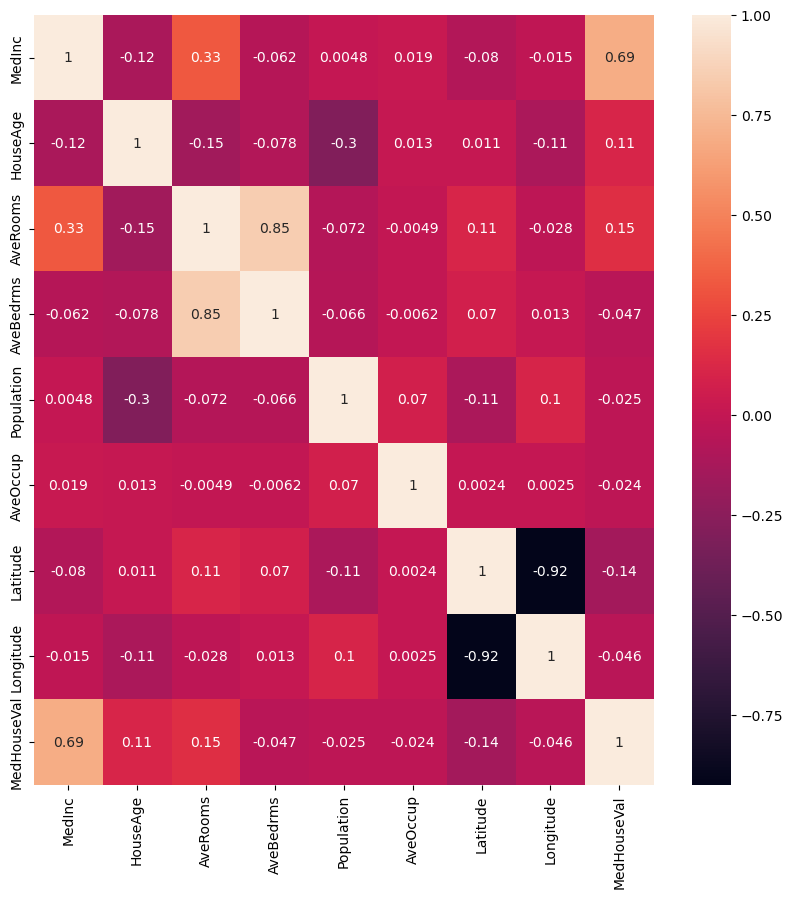

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<Axes: >

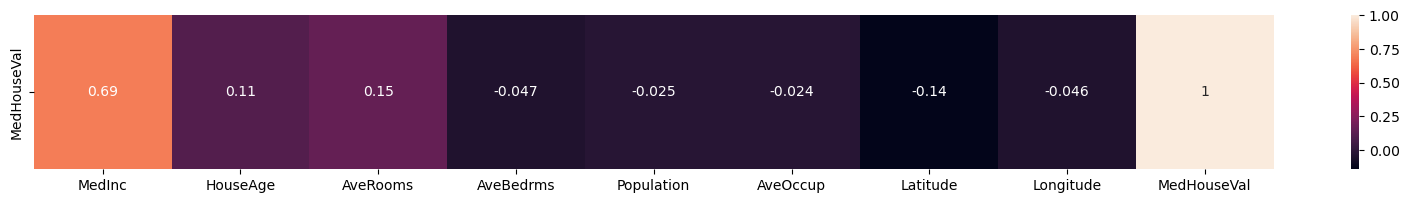

In [28]:
plt.figure(figsize=(20,2))
sns.heatmap(df.corr().tail(1),annot=True)

In [32]:
#2. No multicolinearity - checked only on independent variable

x=df.drop('MedHouseVal',axis=1)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [33]:
vif=variance_inflation_factor(x,2)  #-vif of column index 2 i.e AveRooms
vif

45.99360103802389

In [45]:
vif_list=[]

for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    vif_list.append(vif)
    
print(vif_list )  

s=pd.Series(vif_list, index=x.columns)
print()
print(s)

[11.511140059486932, 7.195917300645759, 45.99360103802389, 43.59031403163056, 2.935745199687898, 1.0952432155971745, 559.8740713791312, 633.7116543669108]

MedInc         11.511140
HouseAge        7.195917
AveRooms       45.993601
AveBedrms      43.590314
Population      2.935745
AveOccup        1.095243
Latitude      559.874071
Longitude     633.711654
dtype: float64


In [53]:
s1=s.sort_values()
s1

AveOccup        1.095243
Population      2.935745
HouseAge        7.195917
MedInc         11.511140
AveBedrms      43.590314
AveRooms       45.993601
Latitude      559.874071
Longitude     633.711654
dtype: float64

<Axes: >

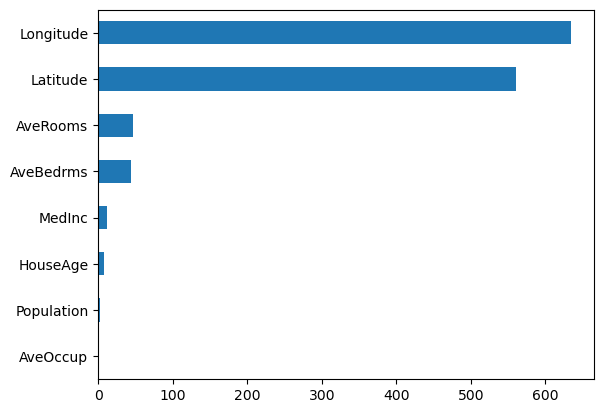

In [54]:
s1.plot(kind='barh')    #Highly corelated are Latitude and Longitude and needs to be removed, but here we don't

                        #Vif range >5= good co relation between independent variables, need to drop those features

#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot (DataFrame only)

In [59]:
x=df.drop("MedHouseVal",axis=1)
y=df['MedHouseVal']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15404,4.0776,13.0,6.117264,1.055375,1767.0,2.877850,33.23,-117.24
16396,2.4342,22.0,5.086667,0.996667,790.0,2.633333,38.01,-121.24
2428,1.8958,33.0,4.939516,1.108871,1065.0,4.294355,36.61,-119.52
7702,4.4732,36.0,5.770149,1.017910,958.0,2.859701,33.96,-118.13
12966,3.2444,16.0,6.179167,1.204167,1365.0,2.843750,38.70,-121.32
...,...,...,...,...,...,...,...,...
4532,2.2788,47.0,3.774566,1.130058,1499.0,4.332370,34.04,-118.21
4673,4.6838,52.0,6.146758,1.068259,714.0,2.436860,34.08,-118.35
5014,1.9500,50.0,4.814815,1.026667,2300.0,3.407407,34.00,-118.32
9979,3.1563,18.0,6.235294,1.193277,343.0,2.882353,38.68,-122.27


In [60]:
y_train

15404    1.960
16396    1.250
2428     0.551
7702     2.660
12966    1.184
         ...  
4532     1.396
4673     4.790
5014     1.126
9979     0.984
501      1.063
Name: MedHouseVal, Length: 16512, dtype: float64

# Linear regression Model

In [61]:
linear_model=LinearRegression()

linear_model.fit(x_train,y_train)

LinearRegression()

In [70]:
#Training Evaluation Metrics

y_pred_train=linear_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.88966203 1.05079825 0.86132496 ... 1.57276404 1.51943374 1.94779429]

MSE  0.5160618913151613
RMSE  0.7183744784686893
MAE  0.528484111288032
R2  0.6115704251956473


In [69]:
#Testing Evaluation Metrics

y_pred=linear_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)

[1.8032743  2.80815983 1.99945602 ... 1.6258457  1.8208324  0.67242658]

MSE  0.5718012024769182
RMSE  0.756175378121318
MAE  0.5337202255972623
R2  0.5743251711424033


<Axes: >

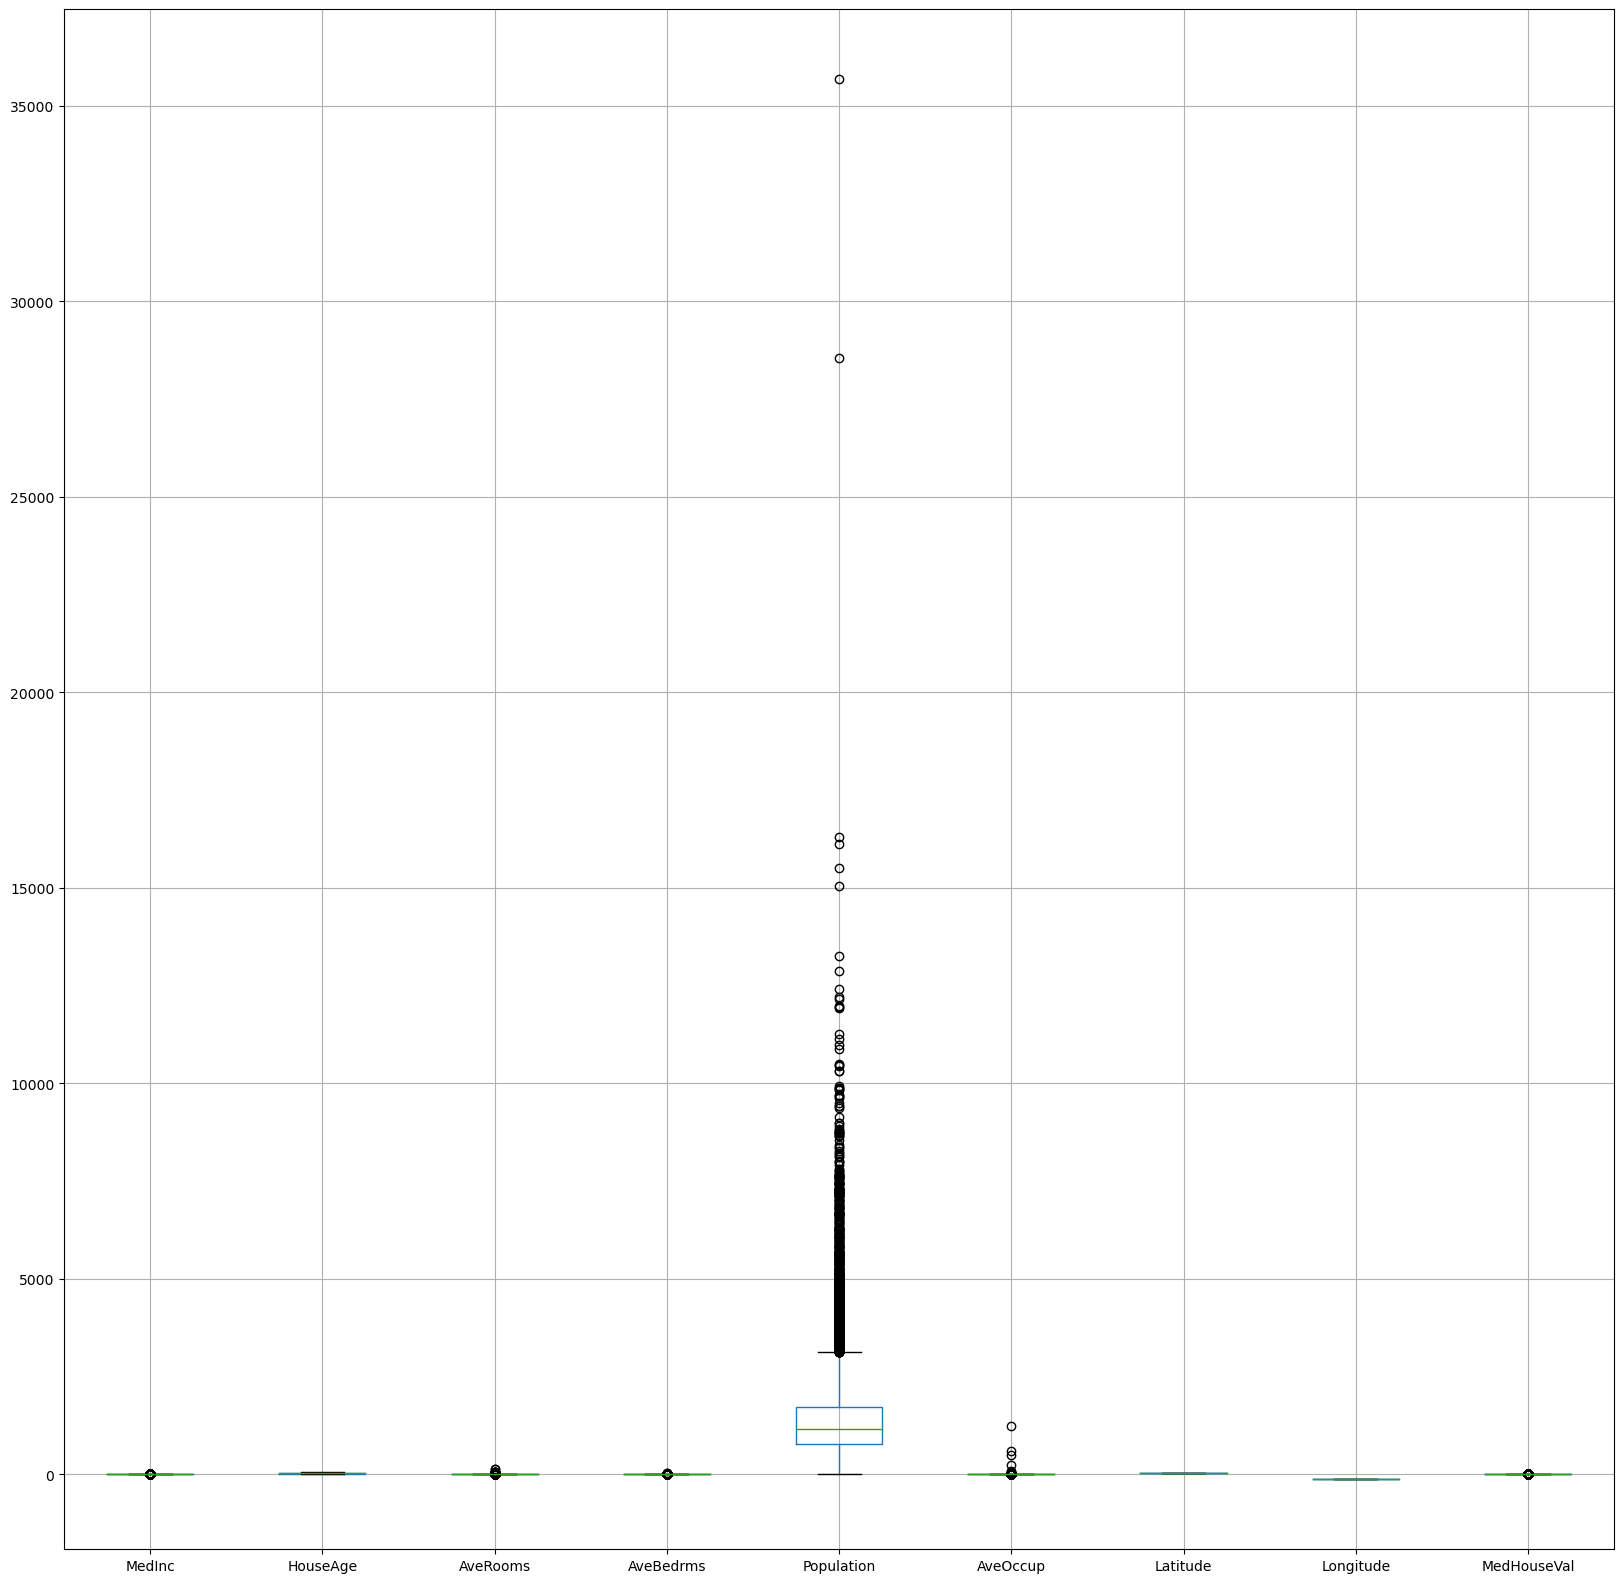

In [71]:
# To check outliers

plt.figure(figsize=(20,20))
df.boxplot()

In [72]:
#to get all slopes of independent variables(all the m values)
linear_model.coef_

array([ 4.48279312e-01,  9.52132056e-03, -1.27608638e-01,  8.41842128e-01,
        5.94206528e-08, -4.77815802e-03, -4.19168711e-01, -4.33143104e-01])

In [73]:
s2=pd.Series(linear_model.coef_, index=x.columns)  #compare m values with Ridge and Lasso
s2

MedInc        4.482793e-01
HouseAge      9.521321e-03
AveRooms     -1.276086e-01
AveBedrms     8.418421e-01
Population    5.942065e-08
AveOccup     -4.778158e-03
Latitude     -4.191687e-01
Longitude    -4.331431e-01
dtype: float64

<Axes: >

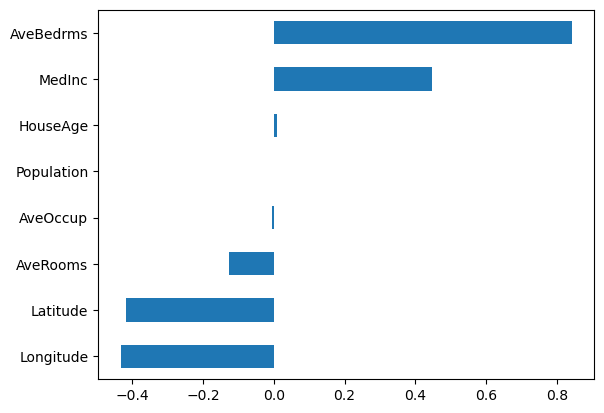

In [81]:
s2.sort_values().plot(kind = "barh")

# Ridge Regression / L2 Regularization

In [76]:
ridge_model=Ridge(alpha=1.0)  # by default value is 1
ridge_model.fit(x_train,y_train)

Ridge()

In [77]:
#Training Evaluation Metrics

y_pred_train=ridge_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.88996896 1.05108594 0.86149782 ... 1.57311035 1.51956406 1.94772417]

MSE  0.5160619997073189
RMSE  0.7183745539113415
MAE  0.5284953733622876
R2  0.6115703436110149


In [80]:
#Testing Evaluation Metrics

y_pred=ridge_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)

[1.80327182 2.80838554 1.9982094  ... 1.62531571 1.82110018 0.67204504]

MSE  0.5716503437753611
RMSE  0.7560756204080126
MAE  0.5337188539843435
R2  0.5744374772230637


In [82]:
ridge_model.coef_

array([ 4.48095949e-01,  9.52304105e-03, -1.27265064e-01,  8.39871605e-01,
        6.27926949e-08, -4.77905147e-03, -4.19170126e-01, -4.33121147e-01])

<Axes: >

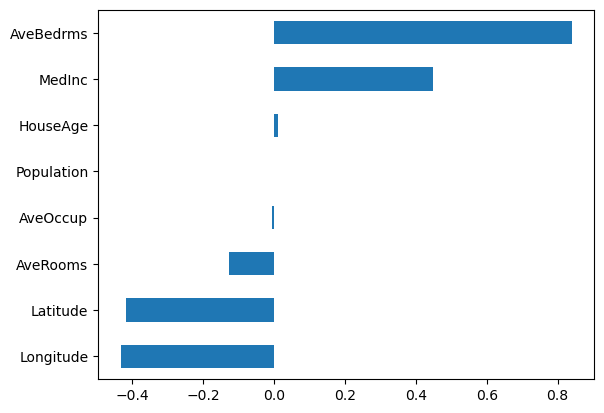

In [84]:
s3=pd.Series(ridge_model.coef_, index= x.columns)
s3.sort_values().plot(kind='barh')

In [86]:
pd.DataFrame({'s2_linear_model':s2,'s3_ridge_model':s3})

,s2_linear_model,s3_ridge_model
MedInc,4.482793e-01,4.480959e-01
HouseAge,9.521321e-03,9.523041e-03
AveRooms,-1.276086e-01,-1.272651e-01
AveBedrms,8.418421e-01,8.398716e-01
Population,5.942065e-08,6.279269e-08
AveOccup,-4.778158e-03,-4.779051e-03
Latitude,-4.191687e-01,-4.191701e-01
Longitude,-4.331431e-01,-4.331211e-01


# Lasso Regression / L1 Regularization

In [87]:
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)

Lasso()

In [88]:
#Training Evaluation Metrics

y_pred_train=lasso_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[2.00586021 1.82414617 1.80645481 ... 1.90283876 1.90959117 1.97726662]

MSE  0.9481906506557886
RMSE  0.9737508154840172
MAE  0.7670682779008906
R2  0.28631565812953075


In [89]:
#Testing Evaluation Metrics

y_pred=lasso_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)


[2.06264203 2.31524174 1.81167161 ... 1.72324694 2.07088194 1.66742248]

MSE  0.9646083613197818
RMSE  0.9821447761505336
MAE  0.7689562724178659
R2  0.281901651586716


In [90]:
#Variance is decreased with Lasso but the model is underfitting with all three models- Linear reg model, Ridge and Lasso

In [92]:
lasso_model.coef_

array([ 1.45713056e-01,  5.69085817e-03,  0.00000000e+00, -0.00000000e+00,
       -6.68687864e-06, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

<Axes: >

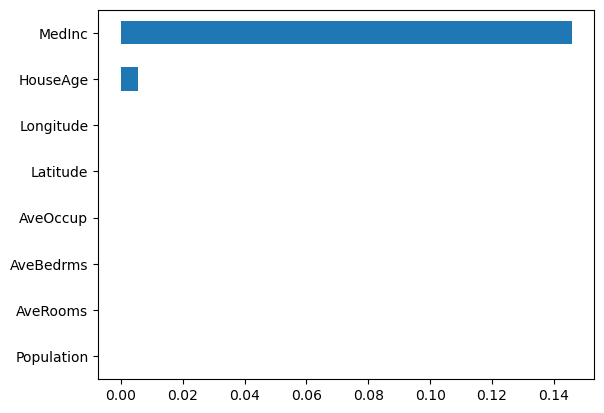

In [94]:
s4=pd.Series(lasso_model.coef_, index=x.columns)  #Values are almost zero
s4.sort_values().plot(kind='barh')

In [95]:
#Aim of Regularization is to reduce the Variance.

# But Bias(error on training data) is increased due to which model is underfitting. 
# To reduce the error we can use technique:
#     1. Need to handle outliers
#     2. Normalization
#     3. Transformation
    
# As we are not getting good accuracy we will tune the value of alpha using Hyper parameter tuning

# Hyperparameter Tunning

# Ridge Regression hyperparameter tunning

## 1. GridSearchCV

In [96]:
ridge_model=Ridge()
param_grid={"alpha": np.arange(0.01,3,0.01)}

gscv_ridge_model=GridSearchCV(ridge_model,param_grid,n_jobs=-1)   #Instance create of GSCV for Ridge model
gscv_ridge_model.fit(x_train,y_train)                             #train model 

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [97]:
gscv_ridge_model.best_estimator_      #This is best value of alpha

Ridge(alpha=2.9899999999999998)

In [98]:
ridge_model=Ridge(alpha=2.9899999999999998)
ridge_model.fit(x_train,y_train)

Ridge(alpha=2.9899999999999998)

In [99]:
#Training Evaluation Metrics

y_pred_train=gscv_ridge_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.89057521 1.05165488 0.86184061 ... 1.57379469 1.51982132 1.94758513]

MSE  0.516062851737544
RMSE  0.7183751469375482
MAE  0.5285181858503974
R2  0.6115697023047227


In [100]:
#Testing Evaluation Metrics

y_pred=gscv_ridge_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)


[1.80326741 2.80883123 1.99574508 ... 1.6242682  1.82162974 0.67129289]

MSE  0.5713536164261538
RMSE  0.7558793663185639
MAE  0.5337168607764345
R2  0.5746583745612366


## 2. RandomizedSerchCV

In [103]:
ridge_model=Ridge()
rscv_ridge_model=RandomizedSearchCV(ridge_model,param_grid,n_jobs=-1)
rscv_ridge_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [104]:
rscv_ridge_model.best_estimator_

Ridge(alpha=2.8699999999999997)

In [105]:
ridge_model=Ridge(alpha=2.8699999999999997)
ridge_model.fit(x_train,y_train)

Ridge(alpha=2.8699999999999997)

In [106]:
#Training Evaluation Metrics

y_pred_train=rsc.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.89053882 1.0516207  0.86181999 ... 1.57375361 1.51980588 1.9475935 ]

MSE  0.5160627766692168
RMSE  0.7183750946888519
MAE  0.5285167994591149
R2  0.6115697588071672


In [107]:
#Testing Evaluation Metrics

y_pred=rscv_ridge_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)


[1.80326766 2.80880448 1.99589306 ... 1.6243311  1.82159793 0.67133798]

MSE  0.5713713794489103
RMSE  0.7558911161330779
MAE  0.5337169552841673
R2  0.5746451509589792


# Lasso Regression Hyperparameter tunning

## 1. GridSearchSV

In [109]:
lasso_model=Lasso()

gscv_lasso_model=GridSearchCV(lasso_model,param_grid,n_jobs=-1)
gscv_lasso_model.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [110]:
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

In [111]:
lasso_model=Lasso(alpha=0.01)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [113]:
#Training Evaluation Metrics

y_pred_train=gscv_lasso_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.95786814 1.12077596 0.91368811 ... 1.65146365 1.54812642 1.92549773]

MSE  0.5220055814308927
RMSE  0.7224995373222689
MAE  0.5335374514988954
R2  0.6070967272472505


In [114]:
#Testing Evaluation Metrics

y_pred=gscv_lasso_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)


[1.80711695 2.85594257 1.71438704 ... 1.50196225 1.88568529 0.60449861]

MSE  0.5510428461410944
RMSE  0.7423226024721964
MAE  0.5362565171654381
R2  0.5897786359870729


## 2. RandomizedSearchCV

In [115]:
lasso_model=Lasso()
rscv_lasso_model=RandomizedSearchCV(lasso_model,param_grid,n_jobs=-1)
rscv_lasso_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0....
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])})

In [116]:
rscv_lasso_model.best_estimator_

Lasso(alpha=0.06999999999999999)

In [118]:
lasso_model=Lasso(alpha=0.06999999999999999)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.06999999999999999)

In [119]:
#Training Evaluation Metrics

y_pred_train=rscv_lasso_model.predict(x_train)
print(y_pred_train)
print()
mse=mean_squared_error(y_train,y_pred_train)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_train,y_pred_train)
print("MAE ",mae)
r2=r2_score(y_train,y_pred_train)
print("R2 ",r2)

[1.98301498 1.25590751 1.13607624 ... 1.7086371  1.54350498 1.83249749]

MSE  0.5691292165619389
RMSE  0.7544065326877405
MAE  0.559189175648998
R2  0.5716276994712599


In [120]:
#Testing Evaluation Metrics

y_pred=rscv_lasso_model.predict(x_test)
print(y_pred)
print()
mse=mean_squared_error(y_test,y_pred)
print("MSE ",mse)
rmse=np.sqrt(mse)
print("RMSE ",rmse)
mae=mean_absolute_error(y_test,y_pred)
print("MAE ",mae)
r2=r2_score(y_test,y_pred)
print("R2 ",r2)


[1.89272711 2.84594252 1.32533615 ... 1.36588997 2.00333514 0.81495625]

MSE  0.5834821150032626
RMSE  0.7638600100825168
MAE  0.5607641717731695
R2  0.5656293684420708


In [ ]:
# Here model is underfitting in all cases, which means outliers are present and we need to handle them.
